In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
wholesale_price = "./JIP/data/hourly_wholesale_electricity_price_02-09.csv"
df = pd.read_csv(wholesale_price)
df.head()

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
0,Netherlands,NLD,2015-01-01 00:00:00,2015-01-01 01:00:00,36.56
1,Netherlands,NLD,2015-01-01 01:00:00,2015-01-01 02:00:00,36.56
2,Netherlands,NLD,2015-01-01 02:00:00,2015-01-01 03:00:00,36.56
3,Netherlands,NLD,2015-01-01 03:00:00,2015-01-01 04:00:00,36.56
4,Netherlands,NLD,2015-01-01 04:00:00,2015-01-01 05:00:00,36.56


In [6]:
# only keep the Datetime on 2025-09-02
df_day = df[df['Datetime (Local)'].str.contains('2025-09-02')]
df_day


,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
93526,Netherlands,NLD,2025-09-01 22:00:00,2025-09-02 00:00:00,86.00
93527,Netherlands,NLD,2025-09-01 23:00:00,2025-09-02 01:00:00,80.92
93528,Netherlands,NLD,2025-09-02 00:00:00,2025-09-02 02:00:00,83.68
93529,Netherlands,NLD,2025-09-02 01:00:00,2025-09-02 03:00:00,80.90
93530,Netherlands,NLD,2025-09-02 02:00:00,2025-09-02 04:00:00,83.30
93531,Netherlands,NLD,2025-09-02 03:00:00,2025-09-02 05:00:00,94.01
93532,Netherlands,NLD,2025-09-02 04:00:00,2025-09-02 06:00:00,88.66
93533,Netherlands,NLD,2025-09-02 05:00:00,2025-09-02 07:00:00,113.66
93534,Netherlands,NLD,2025-09-02 06:00:00,2025-09-02 08:00:00,97.45
93535,Netherlands,NLD,2025-09-02 07:00:00,2025-09-02 09:00:00,90.00


In [16]:
# filter 2025
df_2025 = df[df['Datetime (Local)'].str.contains('2025')]
df_2025.head()

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
87671,Netherlands,NLD,2024-12-31 23:00:00,2025-01-01 00:00:00,13.62
87672,Netherlands,NLD,2025-01-01 00:00:00,2025-01-01 01:00:00,6.24
87673,Netherlands,NLD,2025-01-01 01:00:00,2025-01-01 02:00:00,4.16
87674,Netherlands,NLD,2025-01-01 02:00:00,2025-01-01 03:00:00,3.28
87675,Netherlands,NLD,2025-01-01 03:00:00,2025-01-01 04:00:00,0.68


In [17]:
# rewrite the dataframe to csv
df_2025.to_csv("./JIP/data/hourly_wholesale_electricity_price_2025.csv", index=False)

Loaded 6717 hourly records for 2025.

Selected representative days for 2025:
Typical   : 2025-09-15
Negative  : 2025-09-16
High price: 2025-01-20
Volatile  : 2025-05-11


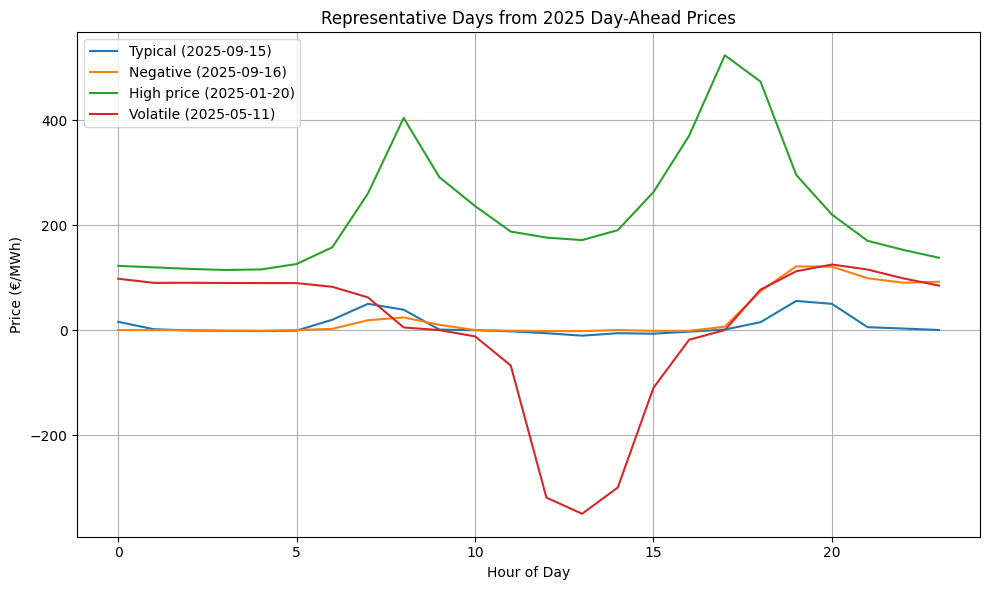

In [19]:
# Try to infer the datetime column automatically
datetime_col = [col for col in df_2025.columns if "time" in col.lower() or "date" in col.lower()][0]
price_col = [col for col in df_2025.columns if "price" in col.lower()][0]

df_2025[datetime_col] = pd.to_datetime(df_2025[datetime_col], errors="coerce")
df_2025 = df_2025.dropna(subset=[datetime_col])
df_2025 = df_2025.set_index(datetime_col).sort_index()

# Confirm hourly data and drop missing
df_2025 = df_2025.dropna(subset=[price_col])
print(f"Loaded {len(df_2025)} hourly records for 2025.")

# Group by day to create daily 24-hour price profiles
daily = df_2025[price_col].groupby(df_2025.index.date).apply(lambda x: x.values[:24])
daily = daily[daily.apply(len) == 24]  # keep only complete 24h days

price_matrix = np.vstack(daily.values)
dates = np.array(daily.index)

# Extract simple statistics
daily_mean = price_matrix.mean(axis=1)
daily_std = price_matrix.std(axis=1)
daily_min = price_matrix.min(axis=1)
daily_max = price_matrix.max(axis=1)
neg_hours = (price_matrix < 0).sum(axis=1)

# Cluster to find the “typical day” 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(price_matrix / np.std(price_matrix, axis=1, keepdims=True))

cluster_sizes = np.bincount(labels)
largest_cluster = np.argmax(cluster_sizes)

centroid = kmeans.cluster_centers_[largest_cluster]
dists = np.linalg.norm(price_matrix[labels == largest_cluster] - centroid, axis=1)
typical_day_idx = np.where(labels == largest_cluster)[0][np.argmin(dists)]
typical_day = dates[typical_day_idx]

# Identify the extreme scenarios
neg_day = dates[np.argmax(neg_hours)]                  # Most negative hours
high_price_day = dates[np.argmax(daily_max)]           # Highest spike
volatile_day = dates[np.argmax(daily_std)]             # Most volatile

# Combine and display results
selected_days = {
    "Typical": typical_day,
    "Negative": neg_day,
    "High price": high_price_day,
    "Volatile": volatile_day
}

print("\nSelected representative days for 2025:")
for name, day in selected_days.items():
    print(f"{name:10s}: {day}")

# Plot the 4 representative days
plt.figure(figsize=(10,6))
for label, day in selected_days.items():
    plt.plot(range(24), price_matrix[dates == day][0], label=f"{label} ({day})")

plt.xlabel("Hour of Day")
plt.ylabel("Price (€/MWh)")
plt.title("Representative Days from 2025 Day-Ahead Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# insert picture to markdown
plt.savefig("./JIP/data/representative_days_2025.png")